In [48]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [18]:
scipy.stats.binom.pmf(k=6, n=9, p=0.5) # R code 2.2

0.16406250000000006

# Grid search (R code 2.3)

In [39]:
num_grid_points = 20
def calculate_posterior(num_grid_points, k, n, make_prior):
    p_grid = np.linspace(start=0, stop=1, num=num_grid_points)
    prior = make_prior(p_grid) #np.ones((num_grid_points,))
    likelihood = scipy.stats.binom.pmf(k=k, n=n, p=p_grid)
    posterior = (likelihood * prior) 
    posterior /= sum(posterior)
    return (p_grid, posterior)

def visualize_posterior(data):
    figure = plt.figure(figsize=(20, 10))
    ax = figure.add_subplot(111)
    p_grid, posterior = data
    ax.plot(p_grid, posterior, 'o')
    ax.plot(p_grid, posterior, color='k')
    ax.set_title('{0} points'.format(len(p_grid)))
    ax.set_ylabel('posterior probability')
    ax.set_xlabel('probability of water')
    return ax

In [ ]:
uniform_prior = lambda x: np.ones(x.shape)
step_prior = lambda x: np.where(x < 0.5, 0, 1)
exp_prior = lambda x: np.exp( -5 * np.abs(x - 0.5))    
visualize_posterior(calculate_posterior(20, 6, 9, exp_prior))

# Monte Carlo Globe tossing

Text(0, 0.5, 'Density')

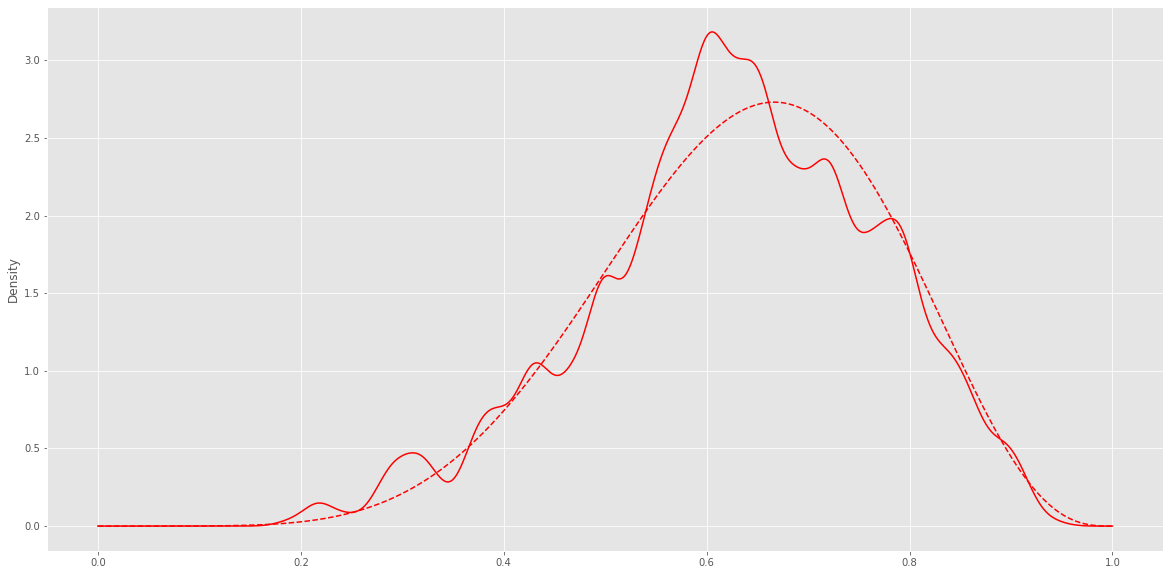

In [93]:
n_samples = 1000
p = [0.5] +[None] * (n_samples - 1)
water = 6
land = 3
total = water + land
for i in range(1, n_samples):
    p_new = abs(np.random.randn() * 0.1 + p[i-1])
    p_new = 2 - p_new if p_new > 1 else p_new
    q0, q1 = scipy.stats.binom.pmf(k=water, n=total, p=[p[i-1], p_new])
    p[i] = p_new if q1/q0 > scipy.stats.uniform.rvs() else p[i-1]

x = np.linspace(start=0, stop=1, num=1000)
beta = scipy.stats.beta.pdf(x, water + 1, land + 1)

figure = plt.figure(figsize=(20, 10))
ax = figure.add_subplot(111)
ax.plot(x, scipy.stats.gaussian_kde(p, bw_method=0.1).evaluate(x), 'r')
ax.plot(x, beta, color='r', linestyle='--')
ax.set_ylabel('Density')

# Excercises

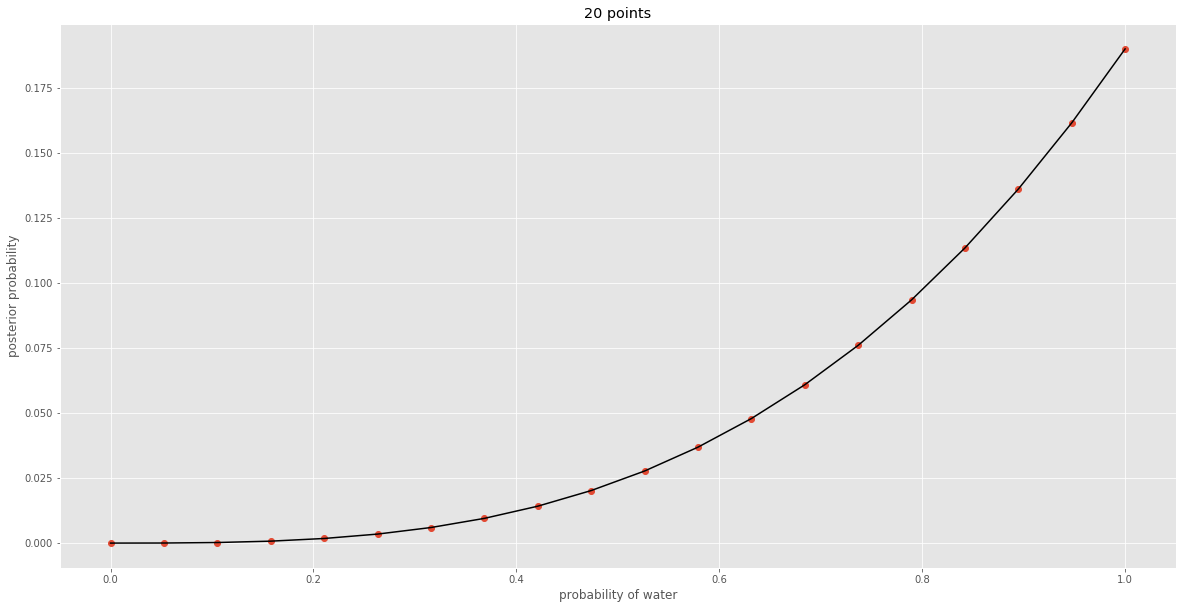

In [98]:
visualize_posterior(calculate_posterior(20, 3, 3, uniform_prior)) # 2M1 (1)

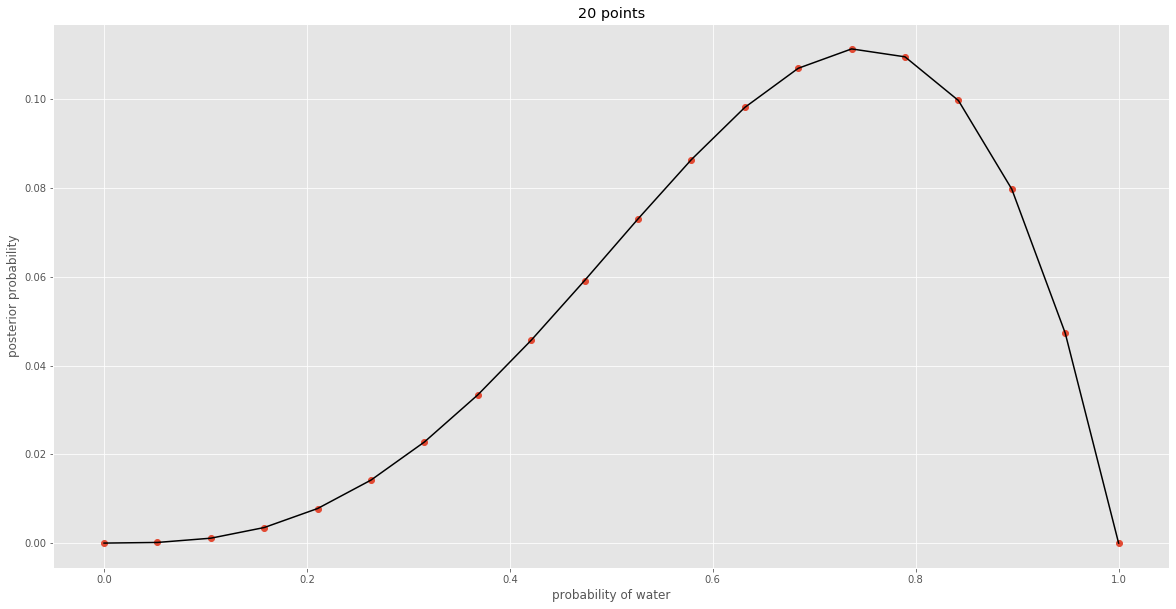

In [99]:
visualize_posterior(calculate_posterior(20, 3, 4, uniform_prior)) # 2M1 (2)

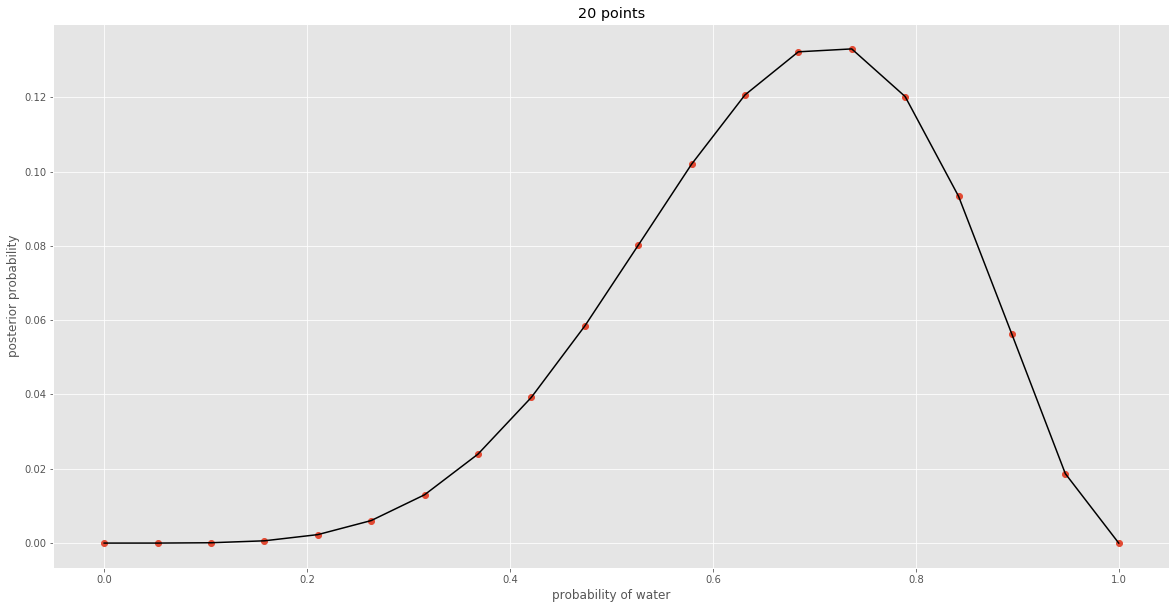

In [100]:
visualize_posterior(calculate_posterior(20, 5, 7, uniform_prior)) # 2M1 (3)

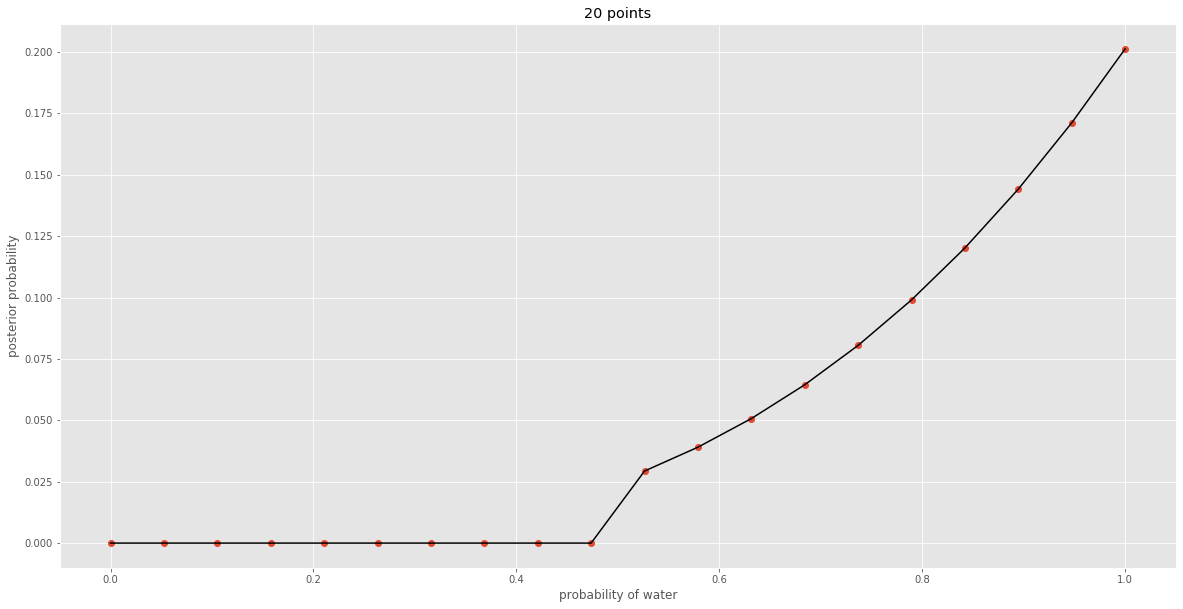

In [124]:
visualize_posterior(calculate_posterior(20, 3, 3, step_prior)) # 2M2 (3)

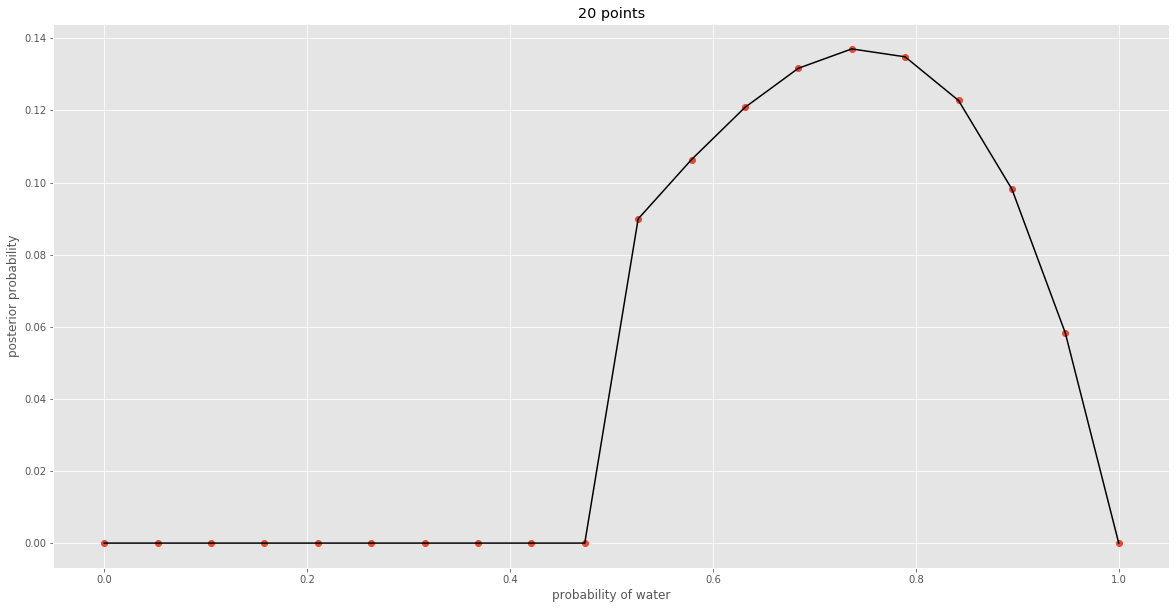

In [126]:
visualize_posterior(calculate_posterior(20, 3, 4, step_prior)) # 2M2 (2)

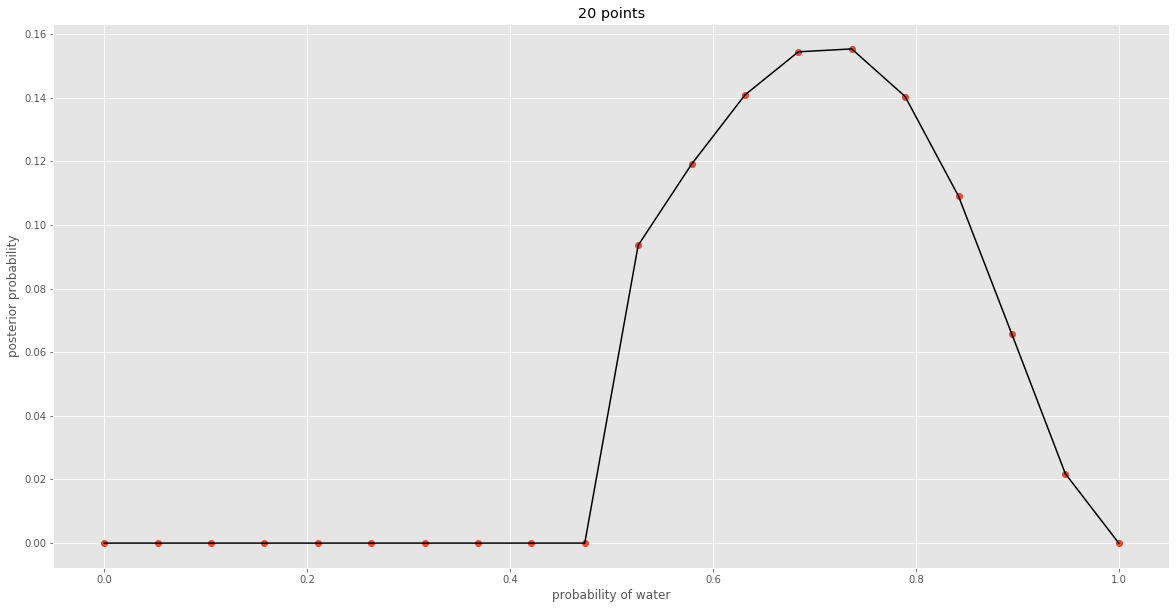

In [127]:
visualize_posterior(calculate_posterior(20, 5, 7, step_prior)) # 2M2 (3)

In [132]:
prior = {}
prior['A'] = 0.5
prior['B'] = 0.5

prob = {}
prob[('T', 'A')] = 0.1
prob[('S', 'A')] = 0.9
prob[('T', 'B')] = 0.2
prob[('S', 'B')] = 0.8

# observe T

likelihood = {}
likelihood['T|A'] = prior['A'] * prob[('T', 'A')]
likelihood['T|B'] = prior['B'] * prob[('T', 'B')]
evidence = {}
evidence['T'] = likelihood['T|A'] + likelihood['T|B']

# bayesian update for observing twins
prior['A'] = likelihood['T|A'] / evidence['T']
prior['B'] = likelihood['T|B'] / evidence['T']

# probability of twins
likelihood['T|A'] = prior['A'] * prob[('T', 'A')]
likelihood['T|B'] = prior['B'] * prob[('T', 'B')]
evidence['T'] = likelihood['T|A'] + likelihood['T|B']

print('2H1',evidence['T'], '\n', '2H2', prior['A']) 

2H1 0.16666666666666666 
 2H2 0.3333333333333333


In [133]:
prior = {}
prior['A'] = 0.5
prior['B'] = 0.5

prob = {}
prob[('T', 'A')] = 0.1
prob[('S', 'A')] = 0.9
prob[('T', 'B')] = 0.2
prob[('S', 'B')] = 0.8

# observe T.

likelihood = {}
likelihood['T|A'] = prior['A'] * prob[('T', 'A')]
likelihood['T|B'] = prior['B'] * prob[('T', 'B')]
evidence = {}
evidence['T'] = likelihood['T|A'] + likelihood['T|B']

# bayesian update for observing twins
prior['A'] = likelihood['T|A'] / evidence['T']
prior['B'] = likelihood['T|B'] / evidence['T']

# observe S.
likelihood = {}
likelihood['S|A'] = prior['A'] * prob[('S', 'A')]
likelihood['S|B'] = prior['B'] * prob[('S', 'B')]
evidence = {}
evidence['S'] = likelihood['S|A'] + likelihood['S|B']

# bayesian update for observing singleton
prior['A'] = likelihood['S|A'] / evidence['S']
prior['B'] = likelihood['S|B'] / evidence['S']
print('2H3', prior['A'])

2H3 0.36000000000000004


In [137]:
# One shot for solving 2H3
prior = {}
prior['A'] = 0.5
prior['B'] = 0.5

prob = {}
prob[('T', 'A')] = 0.1
prob[('S', 'A')] = 0.9
prob[('T', 'B')] = 0.2
prob[('S', 'B')] = 0.8

likelihood = {}
likelihood['(T,S)|A'] = prior['A'] * prob[('T', 'A')] * prob[('S', 'A')]
likelihood['(T,S)|B'] = prior['B'] * prob[('T', 'B')] * prob[('S', 'B')]

evidence = {}
evidence['(T,S)'] = likelihood['(T,S)|A']  + likelihood['(T,S)|B'] 

# bayesian update
prior['A'] = likelihood['(T,S)|A']  / evidence['(T,S)']
prior['B'] = likelihood['(T,S)|B']  / evidence['(T,S)']
print('2H3', prior['A'])

# save for later
prior_birth = {}
prior_birth['A'] = prior['A']
prior_birth['B'] = prior['B']

2H3 0.36


In [138]:
prior = {}
prior['A'] = 0.5
prior['B'] = 0.5

prob = {}
prob[('T', 'A')] = 0.1
prob[('S', 'A')] = 0.9
prob[('T', 'B')] = 0.2
prob[('S', 'B')] = 0.8
prob[('GA', 'A')] = 0.8
prob[('GA', 'B')] = 1 - 0.65 # probability that species B is id'ed as species A

# with only evidence from the tests
likelihood = {}
likelihood['GA|A'] = prior['A'] * prob[('GA', 'A')]
likelihood['GA|B'] = prior['B'] * prob[('GA', 'B')]

# bayesian update
print('2H4, w/o birth data',likelihood['GA|A']/ (likelihood['GA|A'] + likelihood['GA|B']))

# with all evidence
prior = prior_birth
likelihood = {}
likelihood['GA|A'] = prior['A'] * prob[('GA', 'A')]
likelihood['GA|B'] = prior['B'] * prob[('GA', 'B')]

# bayesian update
print('2H4, w/ birth data',likelihood['GA|A']/ (likelihood['GA|A'] + likelihood['GA|B']))

2H4, w/o birth data 0.6956521739130436
2H4, w/ birth data 0.5625
